In [18]:
import pandas as pd
import numpy as np

from numpy import meshgrid

from datetime import date

## For plotting
import matplotlib.pyplot as plt
import matplotlib.cm as cm #color maps
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

stats = pd.read_csv("cc-solve-data.csv")
stats['date']=pd.to_datetime(stats['date'])
stats['date_ordinal'] = stats['date'].apply(lambda date: date.toordinal())




In [10]:
date.fromordinal(stats['date_ordinal'][2])
#stats['date_ordinal'].apply(lambda date: date.fromordinal())

datetime.date(2018, 1, 3)

In [3]:
stats_copy=stats.loc[stats['solved']==1]
X=stats_copy['date']
y=stats_copy['elapsed_seconds']

stats_copy

,date,day,elapsed_seconds,solved,checked,revealed,streak_eligible,date_ordinal
7,2018-01-08,Mon,612,1,1,0,0,736702
14,2018-01-15,Mon,628,1,1,0,0,736709
21,2018-01-22,Mon,750,1,0,0,0,736716
22,2018-01-23,Tue,2042,1,1,1,0,736717
35,2018-02-05,Mon,358,1,1,0,0,736730
...,...,...,...,...,...,...,...,...
1206,2021-04-21,Wed,982,1,1,0,0,737901
1211,2021-04-26,Mon,542,1,1,0,0,737906
1218,2021-05-03,Mon,404,1,0,0,0,737913
1225,2021-05-10,Mon,518,1,0,0,0,737920


In [14]:
stats_copy.groupby('day')['elapsed_seconds'].mean().sort_values(ascending=False).reset_index().head(10)

,day,elapsed_seconds
0,Sun,3128.772727
1,Sat,2650.714286
2,Fri,1943.500000
3,Thu,1781.405405
4,Wed,1265.670732
5,Tue,882.384615
6,Mon,575.485294


In [16]:
block_data = stats_copy.groupby(['day'])['elapsed_seconds'].agg([np.mean, np.std, list]).reset_index()

block_data.sort_values(by='mean', ascending=True, inplace=True)

block_data

,day,mean,std,list
1,Mon,575.485294,202.432649,"[612, 628, 750, 358, 1719, 784, 784, 528, 523,..."
5,Tue,882.384615,408.034774,"[2042, 623, 1444, 1231, 952, 1228, 576, 560, 1..."
6,Wed,1265.670732,639.625644,"[1433, 1469, 704, 1111, 892, 705, 610, 886, 24..."
4,Thu,1781.405405,552.257461,"[1402, 1250, 2204, 2836, 2107, 2333, 3455, 242..."
0,Fri,1943.500000,575.071467,"[2746, 3161, 2321, 2342, 2024, 1509, 1747, 167..."
2,Sat,2650.714286,1114.171847,"[1881, 5077, 1955, 2756, 2351, 2480, 2055]"
3,Sun,3128.772727,832.419476,"[4420, 4016, 4462, 4571, 3116, 3838, 3212, 358..."


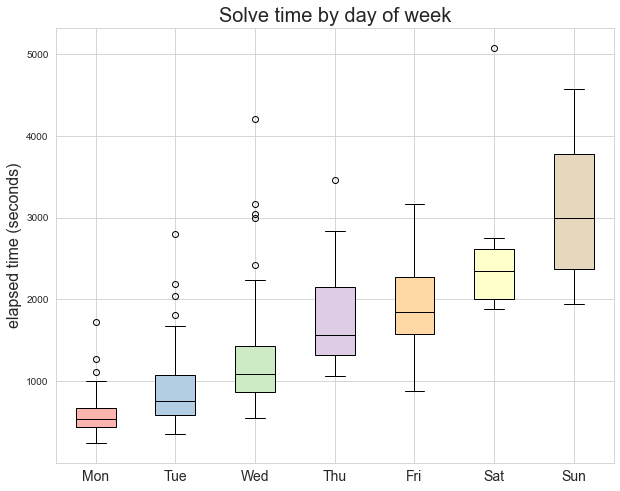

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
bplot = ax.boxplot(block_data['list'],patch_artist=True, medianprops=dict(color='black'))
ax.set_xticklabels(block_data['day'].tolist(),fontsize=14)
ax.set_ylabel('elapsed time (seconds)',fontsize=16)
ax.set_title('Solve time by day of week',fontsize=20)
ax.grid(True,axis='y')

cmap = cm.get_cmap('Pastel1')

for patch, color in zip(bplot['boxes'], cmap.colors):
    patch.set_facecolor(color)
#plt.savefig(fname="density")
plt.show()

In [11]:
stats_Mon=stats.loc[stats['day']=='Mon']
X_2=stats_Mon.loc[stats_Mon['solved']==1]['date']
y_2=stats_Mon.loc[stats_Mon['solved']==1]['elapsed_seconds']


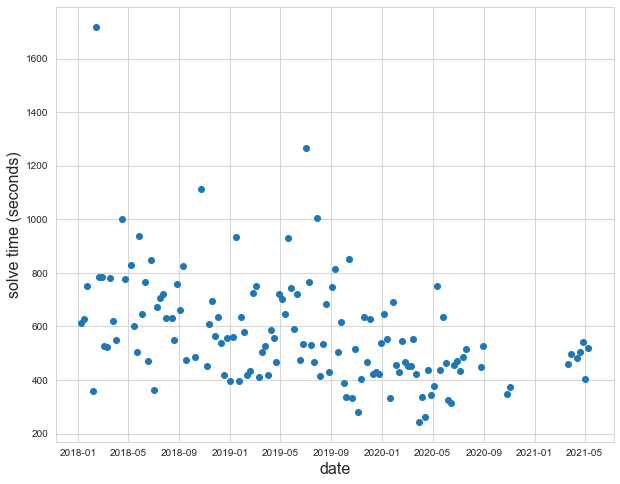

In [13]:
plt.figure(figsize=(10,8))

plt.scatter(X_2,y_2)

plt.xlabel("date", fontsize=16)
plt.ylabel("solve time (seconds)", fontsize=16)

plt.show()

In [5]:
stats_train = stats_Mon.loc[stats_Mon['solved']==1].sample(frac = .75, random_state = 440)

## now use drop and the train index to make test
stats_test = stats_copy.drop(stats_train.index)

In [8]:
X_bar = stats_train.date_ordinal.mean()
y_bar = stats_train.elapsed_seconds.mean()


## We get the covariance and variance
cov = stats_train[['date_ordinal','elapsed_seconds']].cov().iloc[0,1]
var = stats_train.date_ordinal.var()

## Here we calculate beta_1_hat
beta_1_hat = cov/var

## Here we calculate beta_0_hat
beta_0_hat = y_bar - beta_1_hat*X_bar


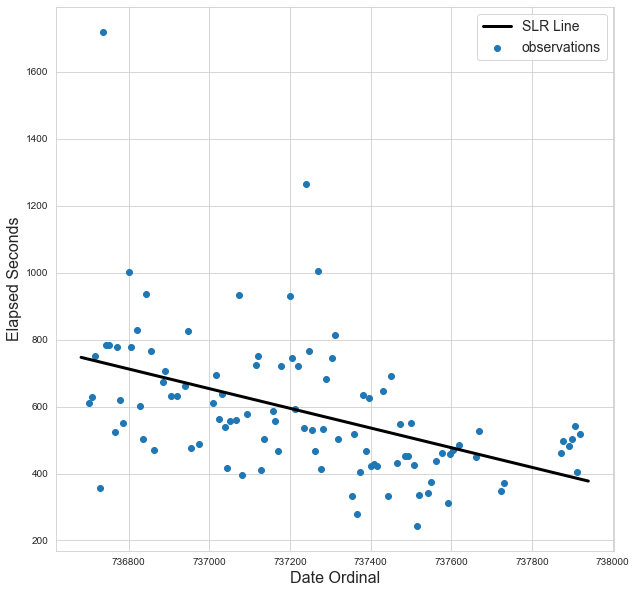

In [28]:
min_rd = stats_train.date_ordinal.min()
max_rd = stats_train.date_ordinal.max()
padding = 20
x = np.linspace(min_rd - padding,max_rd + padding,1000)

plt.figure(figsize = (10,10))

# plt.scatter plots RD on the x and W on the y
plt.scatter(stats_train.date_ordinal, stats_train.elapsed_seconds, label = "observations")

# Now add mean prediction line
plt.plot(np.linspace(min_rd - padding,max_rd + padding,1000),
            beta_0_hat + beta_1_hat*np.linspace(min_rd - padding,max_rd + padding,1000), 'k',
            label="SLR Line",
            linewidth = 3)

# Always good practice to label well when
# presenting a figure to others
# place an xlabel
plt.xlabel("Date Ordinal", fontsize =16)

# place a ylabel
plt.ylabel("Elapsed Seconds", fontsize = 16)

# Add a legend
plt.legend(fontsize=14)

# type this to show the plot
plt.show()